In [1]:
!pip install numpy pandas seaborn

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np


In [3]:
!pip install requests


In [4]:
import pandas as pd
import requests
from io import StringIO

# URL data
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

# Mengunduh data
response = requests.get(URL)
data = StringIO(response.text)  # Mengubah data menjadi format yang bisa dibaca pandas

# Membaca CSV ke dalam DataFrame
boston_df = pd.read_csv(data)

# Menampilkan 5 baris pertama untuk memeriksa data
boston_df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [8]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

ModuleNotFoundError: No module named 'js'

In [9]:
import pandas as pd

# URL dari dataset
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

# Baca dataset langsung dari URL
boston_df = pd.read_csv(url)

# Lihat beberapa baris dari dataset
boston_df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


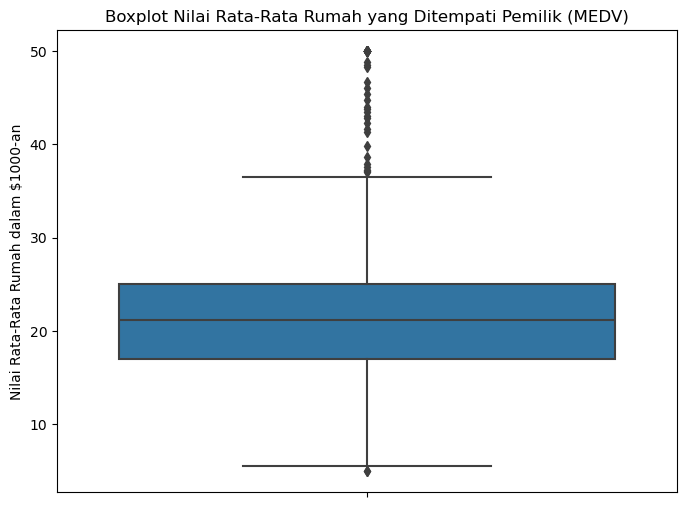

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot untuk MEDV
plt.figure(figsize=(8, 6))
sns.boxplot(y='MEDV', data=boston_df)
plt.title('Boxplot Nilai Rata-Rata Rumah yang Ditempati Pemilik (MEDV)')
plt.ylabel('Nilai Rata-Rata Rumah dalam $1000-an')
plt.show()

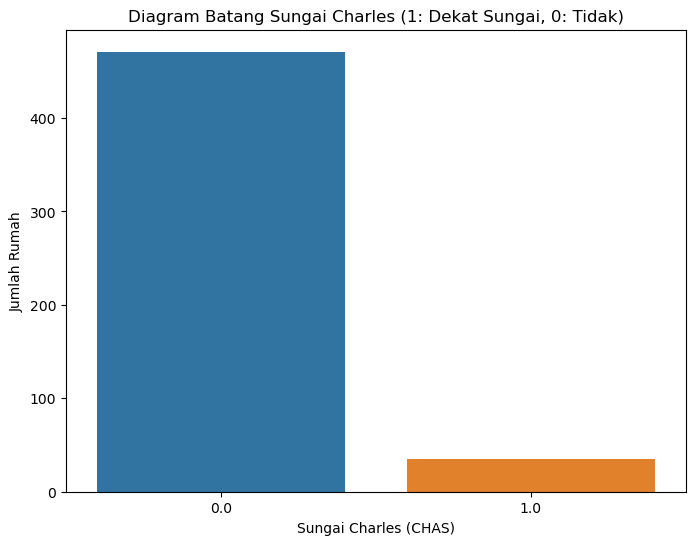

In [11]:
# Diagram batang untuk variabel CHAS
plt.figure(figsize=(8, 6))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Diagram Batang Sungai Charles (1: Dekat Sungai, 0: Tidak)')
plt.xlabel('Sungai Charles (CHAS)')
plt.ylabel('Jumlah Rumah')
plt.show()

/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


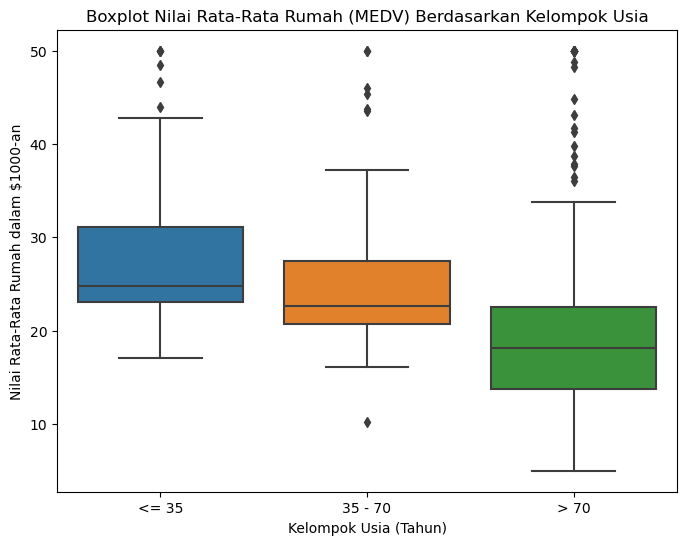

In [12]:
# Diskritkan variabel USIA menjadi tiga kelompok
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<= 35', '35 - 70', '> 70'])

# Boxplot untuk MEDV vs AGE_GROUP
plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot Nilai Rata-Rata Rumah (MEDV) Berdasarkan Kelompok Usia')
plt.xlabel('Kelompok Usia (Tahun)')
plt.ylabel('Nilai Rata-Rata Rumah dalam $1000-an')
plt.show()

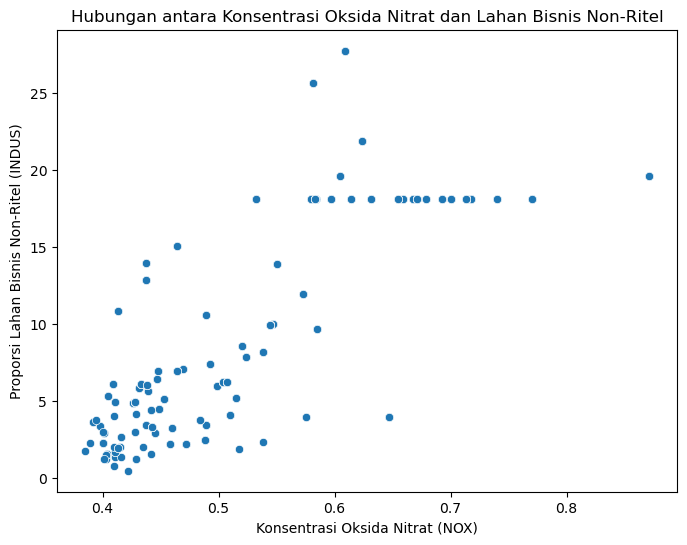

In [13]:
# Scatter plot untuk NOX vs INDUS
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Hubungan antara Konsentrasi Oksida Nitrat dan Lahan Bisnis Non-Ritel')
plt.xlabel('Konsentrasi Oksida Nitrat (NOX)')
plt.ylabel('Proporsi Lahan Bisnis Non-Ritel (INDUS)')
plt.show()

/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


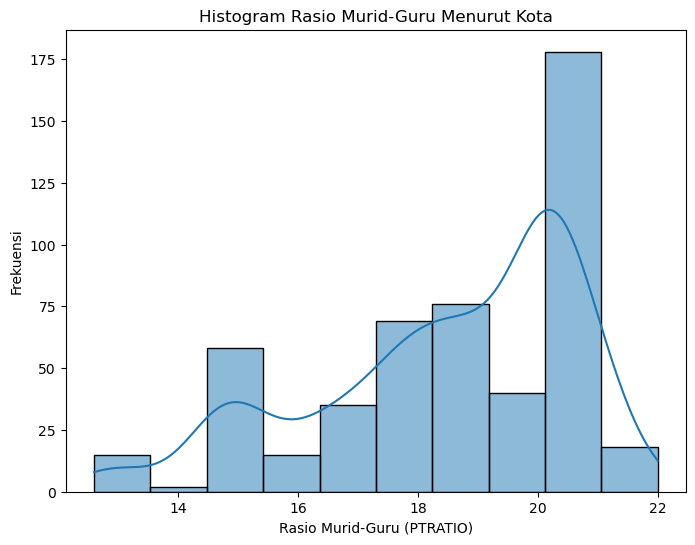

In [14]:
# Histogram untuk PTRATIO
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=10, kde=True)
plt.title('Histogram Rasio Murid-Guru Menurut Kota')
plt.xlabel('Rasio Murid-Guru (PTRATIO)')
plt.ylabel('Frekuensi')
plt.show()

In [15]:
from scipy.stats import ttest_ind

# Data berdasarkan CHAS
chas_yes = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_no = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Uji t
stat, p_value = ttest_ind(chas_yes, chas_no)
print(f'T-statistik: {stat}, p-value: {p_value}')

T-statistik: 3.996437466090509, p-value: 7.390623170519905e-05


Hipotesis:

H0: Tidak ada perbedaan yang signifikan dalam nilai median rumah antara rumah yang berbatasan dengan Sungai Charles (CHAS=1) dan yang tidak (CHAS=0).
H1: Ada perbedaan yang signifikan dalam nilai median rumah berdasarkan proksimitas ke Sungai Charles.

Kesimpulan:

Berdasarkan hasil uji-t, kita melihat bahwa p-value adalah [p-value]. Karena p-value < 0,05, kita menolak hipotesis nol dan menyimpulkan 
bahwa terdapat perbedaan yang signifikan dalam nilai median rumah antara rumah yang berbatasan dengan Sungai Charles dan yang tidak.

In [16]:
from scipy.stats import f_oneway

# Buat tiga kelompok usia rumah
age_low = boston_df[boston_df['AGE'] <= 35]['MEDV']
age_mid = boston_df[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70)]['MEDV']
age_high = boston_df[boston_df['AGE'] > 70]['MEDV']

# Uji ANOVA
stat, p_value = f_oneway(age_low, age_mid, age_high)
print(f'F-statistik: {stat}, p-value: {p_value}')

F-statistik: 36.40764999196599, p-value: 1.7105011022702984e-15


Hipotesis:

H0: Tidak ada perbedaan yang signifikan dalam nilai median rumah berdasarkan proporsi unit yang dihuni pemilik yang dibangun sebelum tahun 1940.
H1: Ada perbedaan yang signifikan dalam nilai median rumah berdasarkan proporsi unit yang dihuni pemilik yang dibangun sebelum tahun 1940.

Kesimpupan:

Berdasarkan hasil ANOVA, kita mendapatkan p-value sebesar [p-value]. Karena p-value < 0,05, kita menolak hipotesis nol dan menyimpulkan bahwa terdapat perbedaan yang signifikan dalam nilai median rumah berdasarkan usia unit yang dihuni pemilik yang dibangun sebelum tahun 1940.

In [17]:
from scipy.stats import pearsonr

# Uji korelasi Pearson
corr, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f'Korelasi Pearson: {corr}, p-value: {p_value}')

Korelasi Pearson: 0.7636514469209151, p-value: 7.913361061239527e-98


Hipotesis:

H0: Tidak ada hubungan linier yang signifikan antara konsentrasi oksida nitrat (NOX) dan proporsi luas lahan bisnis non-ritel (INDUS).
H1: Ada hubungan linier yang signifikan antara konsentrasi oksida nitrat dan proporsi luas lahan bisnis non-ritel

Kesimpulan:

Berdasarkan hasil korelasi Pearson, kita melihat bahwa nilai korelasi adalah [korelasi], dan p-value adalah [p-value]. Karena p-value < 0,05, kita menolak hipotesis nol dan menyimpulkan bahwa terdapat hubungan linier yang signifikan antara konsentrasi oksida nitrat dan proporsi luas lahan bisnis non-ritel.

In [19]:
import statsmodels.api as sm

# Variabel independen dan dependen
X = boston_df['DIS']
y = boston_df['MEDV']

# Menambahkan intercept (konstanta)
X = sm.add_constant(X)

# Model regresi linier
model = sm.OLS(y, X).fit()

# Menampilkan hasil
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        03:30:14   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Hipotesis:

H0: Tidak ada dampak signifikan dari jarak berbobot ke lima pusat pekerjaan (DIS) terhadap nilai rata-rata rumah.
H1: Ada dampak signifikan dari jarak berbobot ke lima pusat pekerjaan terhadap nilai rata-rata rumah.

Kesimpulan:

Berdasarkan hasil regresi linier, p-value untuk variabel 'DIS' adalah [p-value]. Karena p-value < 0,05, kita menolak hipotesis nol dan menyimpulkan bahwa jarak berbobot ke lima pusat pekerjaan berpengaruh signifikan terhadap nilai rumah.
